# Load the Data

In [1]:
from keras.datasets import fashion_mnist 

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Analyze the Data 

In [3]:
# Importing libraries 
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
# Checking for number of classes in data 
classes = np.unique(y_train)
nClasses = len(classes)

print('Total number of outputs :', nClasses)
print('Output classes : ', classes)

Total number of outputs : 10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: 9')

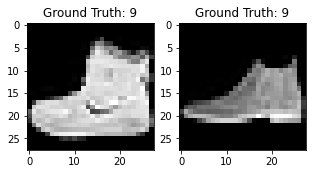

In [6]:
# Plotting a sample 
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title('Ground Truth: {}'.format(y_train[0]))

plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
(plt.title('Ground Truth: {}'.format(y_test[0])))

# Data Preprocessing 

In [7]:
# Reshaping data into a matrix 
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
# Normalizing data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [9]:
# Changing labels from categorical to one-hot encoding 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print('Original label: ', y_train[0])
print('After conversion to one-hot: ', y_train_one_hot[0])

Original label:  9
After conversion to one-hot:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_valid, train_label,valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=13)

In [11]:
X_train.shape, X_valid.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# Model the Data

In [12]:
# Importing libraries 
import keras 
import tensorflow as tf
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization
from keras.layers.advanced_activations import LeakyReLU

In [13]:
batch_size = 64
epochs = 20
num_classes = 10

# Neural Network Architecture 

In [14]:
# Creating network
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Conv2D(128, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

# Compile the Model

In [15]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [16]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

# Train the Model

In [17]:
fashion_train = fashion_model.fit(X_train, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, valid_label))

Epoch 1/20
750/750 [==============================] - 30s 39ms/step - loss: 0.4687 - accuracy: 0.8284 - val_loss: 0.3577 - val_accuracy: 0.8717
Epoch 2/20
750/750 [==============================] - 28s 37ms/step - loss: 0.2894 - accuracy: 0.8949 - val_loss: 0.2935 - val_accuracy: 0.8934
Epoch 3/20
750/750 [==============================] - 29s 38ms/step - loss: 0.2426 - accuracy: 0.9096 - val_loss: 0.2470 - val_accuracy: 0.9055
Epoch 4/20
750/750 [==============================] - 29s 38ms/step - loss: 0.2119 - accuracy: 0.9208 - val_loss: 0.2365 - val_accuracy: 0.9171
Epoch 5/20
750/750 [==============================] - 29s 39ms/step - loss: 0.1885 - accuracy: 0.9300 - val_loss: 0.2318 - val_accuracy: 0.9162
Epoch 6/20
750/750 [==============================] - 29s 38ms/step - loss: 0.1631 - accuracy: 0.9394 - val_loss: 0.2513 - val_accuracy: 0.9159
Epoch 7/20
750/750 [==============================] - 30s 40ms/step - loss: 0.1459 - accuracy: 0.9457 - val_loss: 0.2437 - val_accuracy:

# Model Evaluation on the Test Set

In [18]:
test_eval = fashion_model.evaluate(X_test, y_test_one_hot, verbose=0)

In [19]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4301135241985321
Test accuracy: 0.9185000061988831


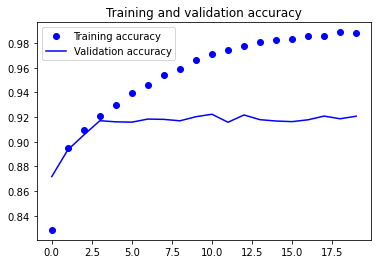

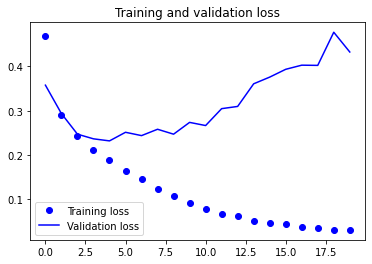

In [22]:
# Plotting the results
accuracy = fashion_train.history['accuracy'] 
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Adding Dropout into the Network

In [23]:
batch_size = 64
epochs = 20
num_classes = 10

In [24]:
# Dropout layer to reduce overfiting
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Dropout(0.25))                              
fashion_model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [26]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [27]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [29]:
fashion_train_dropout = fashion_model.fit(X_train, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, valid_label))

Epoch 1/20
750/750 [==============================] - 33s 43ms/step - loss: 0.6003 - accuracy: 0.7756 - val_loss: 0.3693 - val_accuracy: 0.8637
Epoch 2/20
750/750 [==============================] - 32s 43ms/step - loss: 0.3732 - accuracy: 0.8614 - val_loss: 0.3081 - val_accuracy: 0.8910
Epoch 3/20
750/750 [==============================] - 32s 43ms/step - loss: 0.3282 - accuracy: 0.8783 - val_loss: 0.2801 - val_accuracy: 0.8972
Epoch 4/20
750/750 [==============================] - 36s 48ms/step - loss: 0.2996 - accuracy: 0.8881 - val_loss: 0.2578 - val_accuracy: 0.9039
Epoch 5/20
750/750 [==============================] - 37s 49ms/step - loss: 0.2805 - accuracy: 0.8962 - val_loss: 0.2823 - val_accuracy: 0.8951
Epoch 6/20
750/750 [==============================] - 36s 48ms/step - loss: 0.2671 - accuracy: 0.9006 - val_loss: 0.2470 - val_accuracy: 0.9062
Epoch 7/20
750/750 [==============================] - 37s 50ms/step - loss: 0.2557 - accuracy: 0.9049 - val_loss: 0.2504 - val_accuracy:

In [30]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


# Model Evaluation on the Test Set

In [31]:
test_eval = fashion_model.evaluate(X_test, y_test_one_hot, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.2354 - accuracy: 0.9175


In [32]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.23537562787532806
Test accuracy: 0.9175000190734863


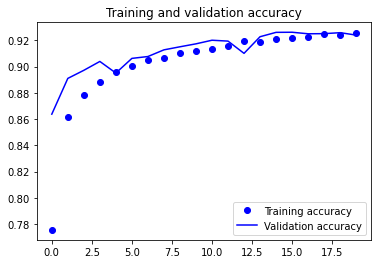

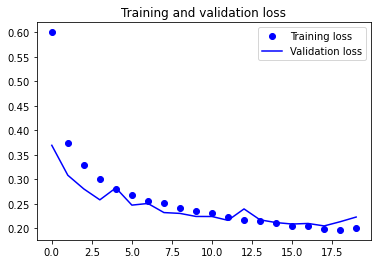

In [34]:
# Plotting the results after adding dropout layer 
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Predicted Labels 

In [37]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [38]:
predicted_classes.shape, y_test.shape

((10000,), (10000,))

Found 9149 correct labels


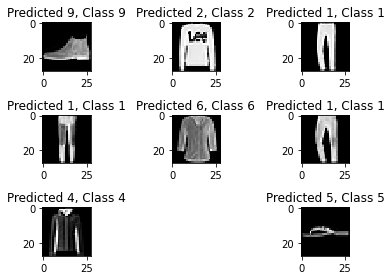

In [42]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 851 incorrect labels


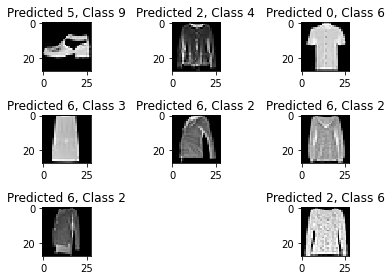

In [52]:
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

# Classification Report 

In [53]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.92      0.84      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.88      0.87      0.87      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.92      0.82      0.86      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.77      0.75      0.76      1000
     Class 7       0.94      0.99      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.91      0.92     10000

